<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/src/RandomForestClassifier_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Impor Pustaka (Library Import)**

In [1]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Pemuatan Dataset dari Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           classification_report, confusion_matrix, ConfusionMatrixDisplay,
                           roc_auc_score, roc_curve)

# Visualisasi Decision Tree
from sklearn.tree import export_graphviz
import graphviz

## **2. Load data dan Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan memuat dataset dan melakukan beberapa langkah eksplorasi data awal untuk memahami karakteristik data yang kita miliki.

### **2.1 Memuat Dataset**

Dataset diunduh langsung dari Kaggle Hub menggunakan pustaka kagglehub.


In [2]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  "winequality-red.csv"
)

display(df.head())

<ipython-input-2-92150c9e3da5>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **2.2 Pemeriksaan Awal Data**

Kita akan melihat informasi dasar dari dataset seperti tipe data setiap kolom, jumlah entri, dan ringkasan statistiknya.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **2.3 Data Cleaning: Duplikat dan Missing Value**

In [5]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df.drop_duplicates(inplace=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  240
Jumlah baris sebelum menghapus duplikat: 1599
Jumlah baris setelah menghapus duplikat : 1359


In [6]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Hasil di atas menunjukkan bahwa data sudah bersih dari nilai yang hilang.

### **2.4 Visualisasi Distribusi Fitur**


Visualisasi Distribusi Setiap Fitur:


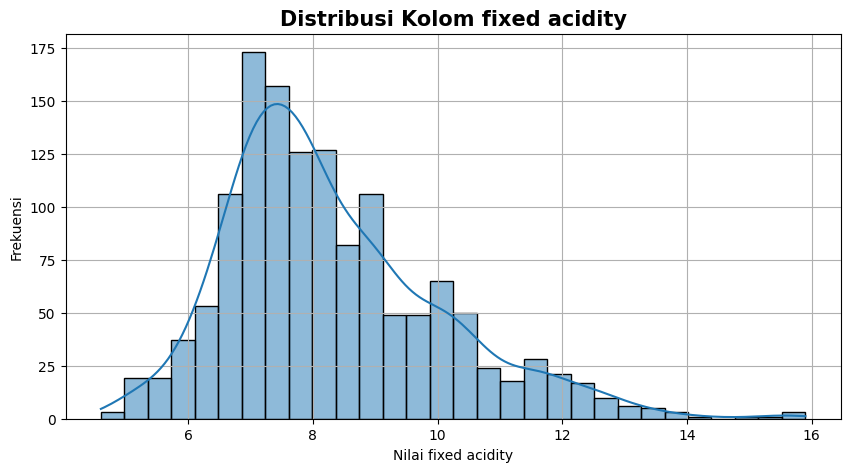

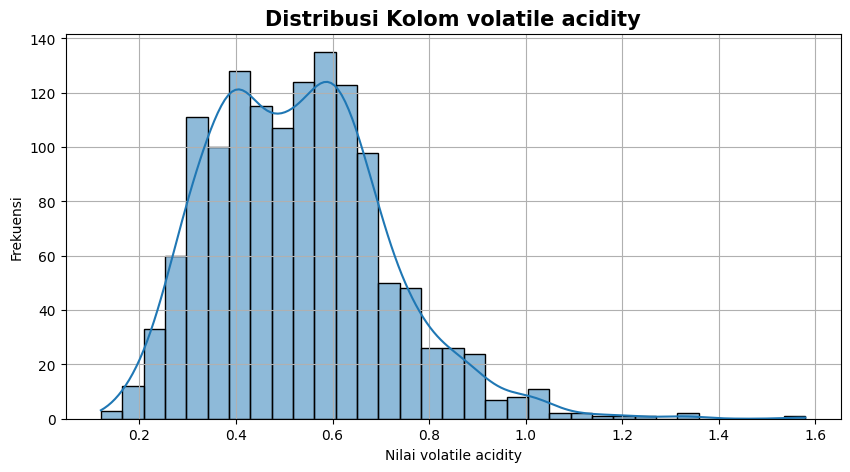

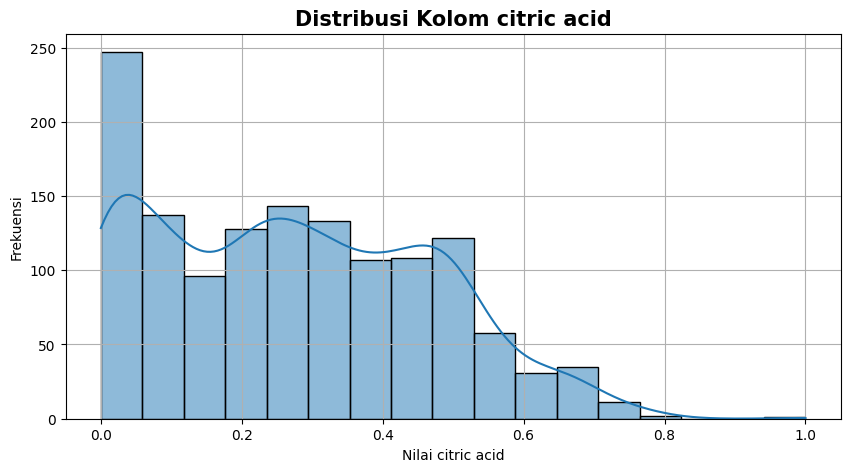

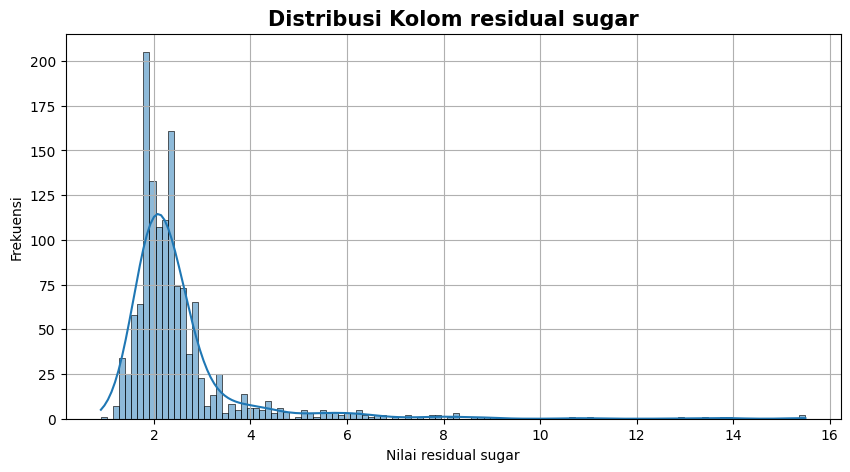

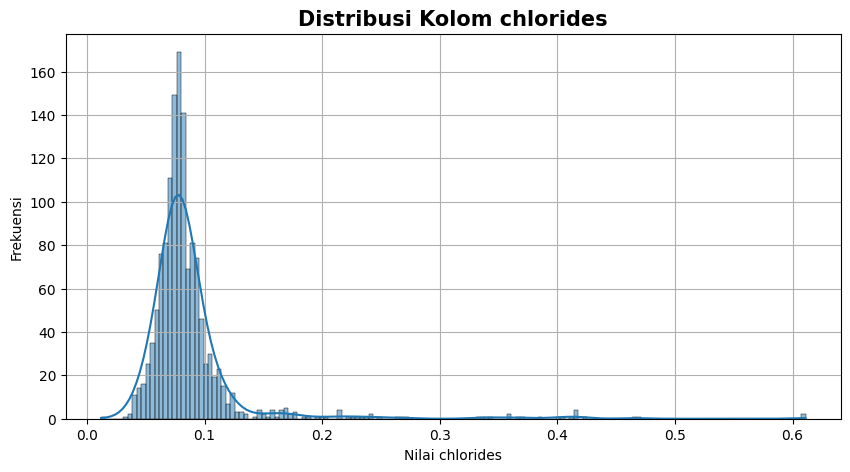

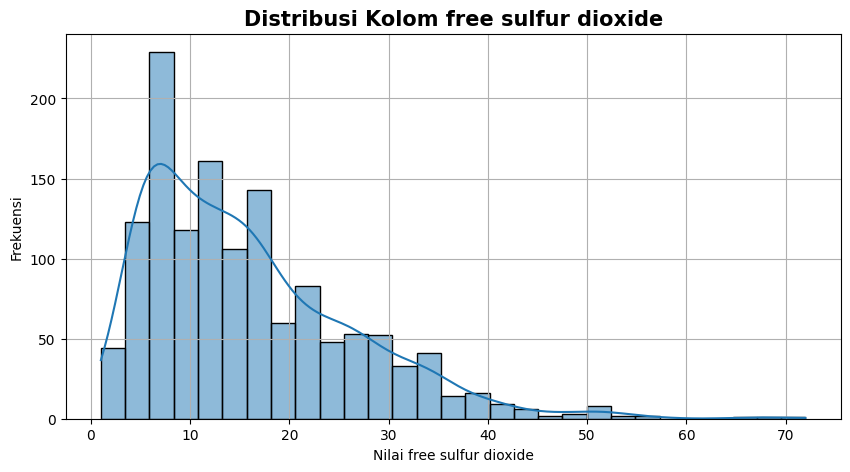

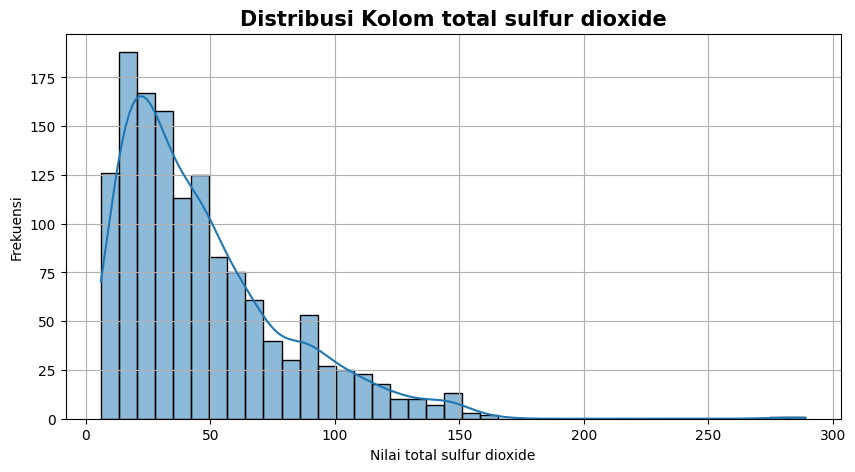

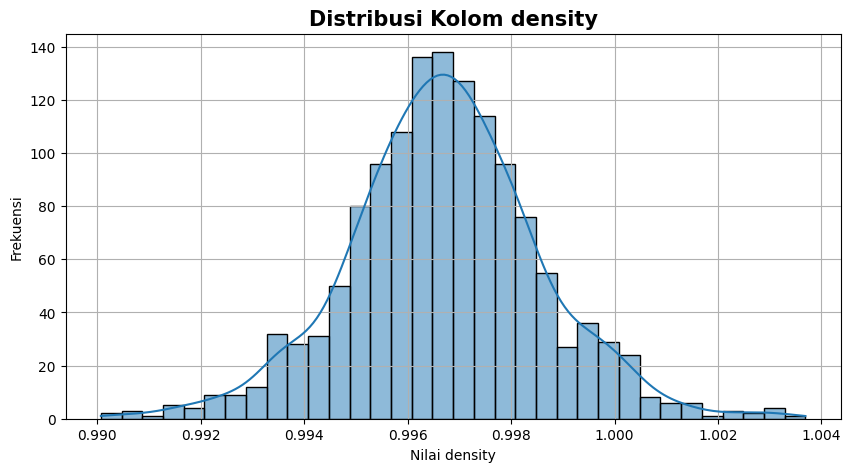

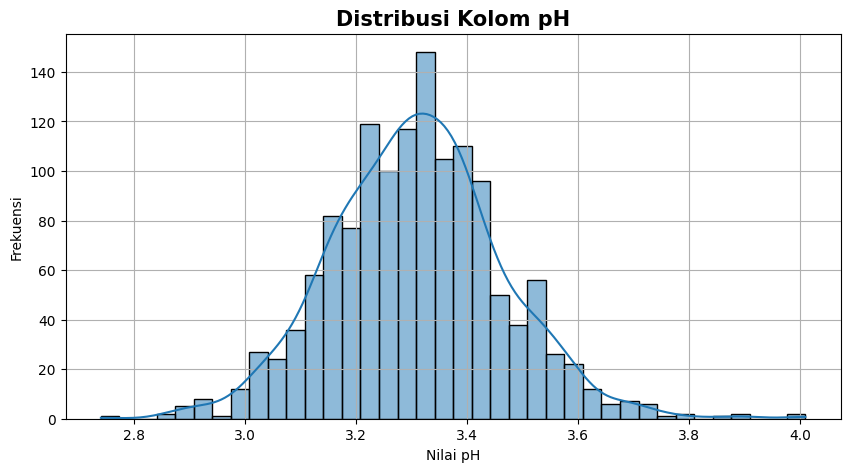

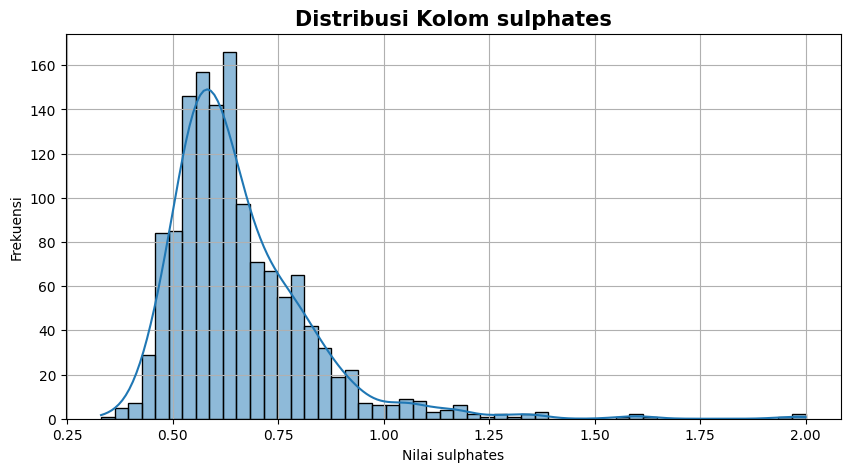

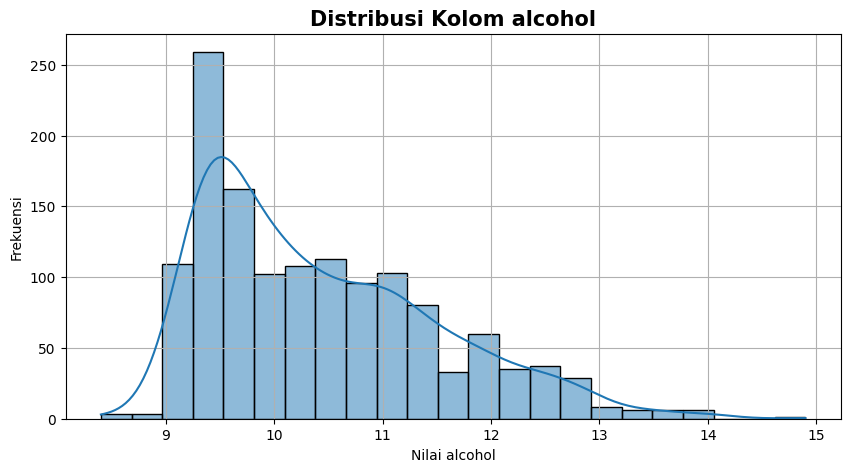

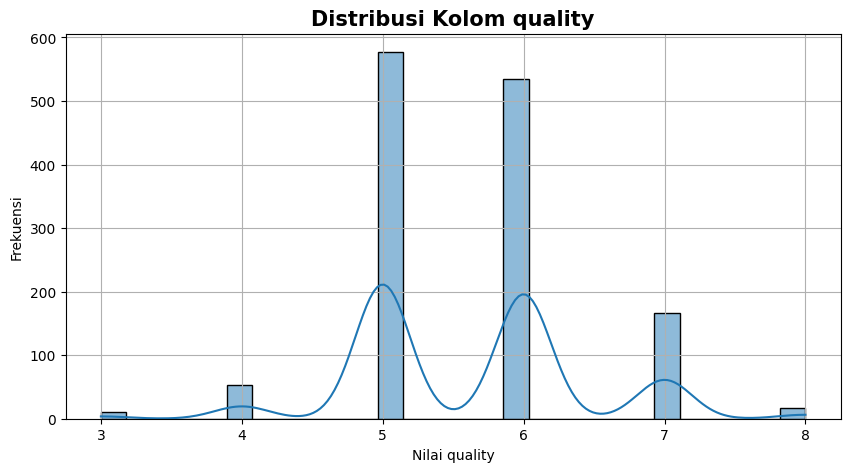

In [7]:
print("\nVisualisasi Distribusi Setiap Fitur:")
for column in df.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
  plt.xlabel(f'Nilai {column}')
  plt.ylabel(f'Frekuensi')
  plt.grid(True)

### **2.5 Identifikasi Outliers**

Boxplot digunakan untuk melihat sebaran data dan mengidentifikasi adanya outliers (pencilan) pada setiap fitur.


Boxplot untuk Setiap Fitur


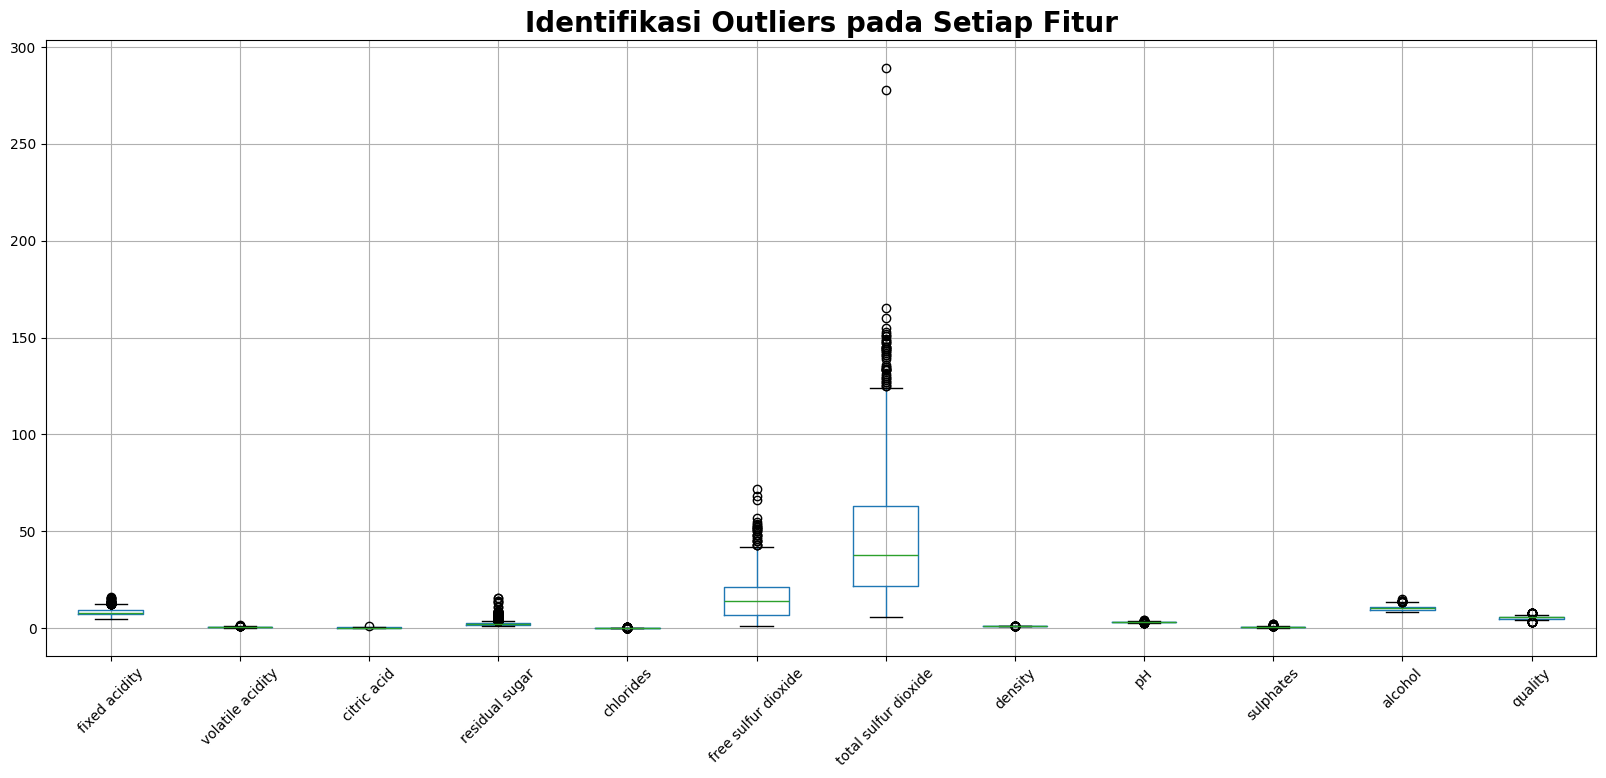

In [10]:
print("\nBoxplot untuk Setiap Fitur")
plt.figure(figsize=(20, 8))
df.boxplot()
plt.title('Identifikasi Outliers pada Setiap Fitur', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### **2.6 Analisis Korelasi**

Heatmap korelasi menunjukkan hubungan linear antar variabel. Korelasi yang tinggi antara fitur-fitur independen (multikolinearitas) dapat memengaruhi interpretasi model.

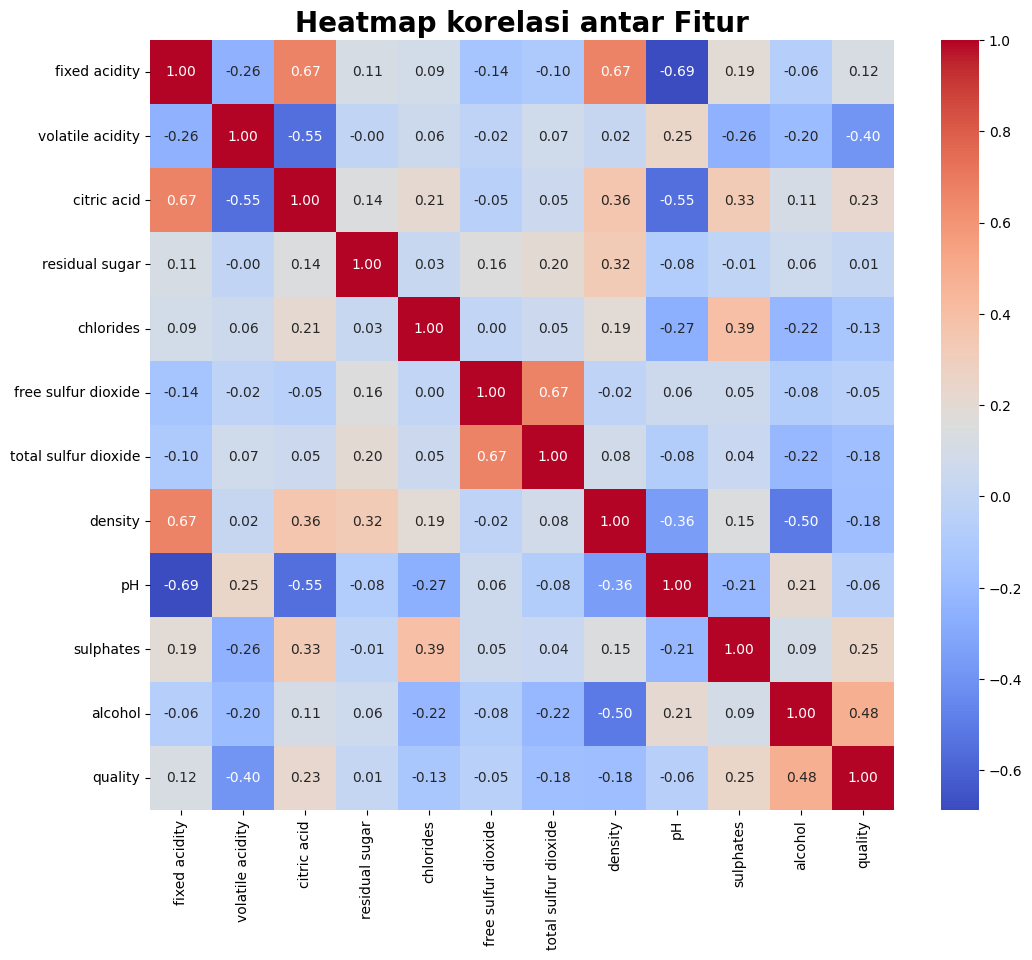

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi antar Fitur', fontsize=20, fontweight='bold')
plt.show()

## **3. Feature Engineering dan Data Splitting**

Pada bagian ini, kita akan mempersiapkan data untuk pemodelan.

### **3.1 Transformasi Variabel Target**

Sesuai dengan deskripsi dataset, kita akan mengubah masalah ini dari regresi menjadi klasifikasi. Kolom target quality akan diubah menjadi variabel biner:
- **`1` (Baik)**: Jika quality >= 7
- **`0` (Buruk)**: Jika quality < 7

In [13]:
# Mengubah kolom 'quality' menjadi kategori biner (0 = bad, 1 = good)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

print("Hasil transformasi kolom 'quality':")
df['quality'].head(10)

Hasil transformasi kolom 'quality':


,quality
0,0
1,0
2,0
3,0
5,0
6,0
7,1
8,1
9,0
10,0


### **3.2 Pemeriksaan Keseimbangan Kelas (Class Balance)**

Setelah transformasi, penting untuk memeriksa distribusi kelas pada variabel target. Ketidakseimbangan kelas dapat menyebabkan bias pada model.

Memeriksa distribusi kelas setelah transformasi

In [14]:
df['quality'].value_counts()

,count
quality,
0,1175
1,184


Visualisasi distribusi kelas

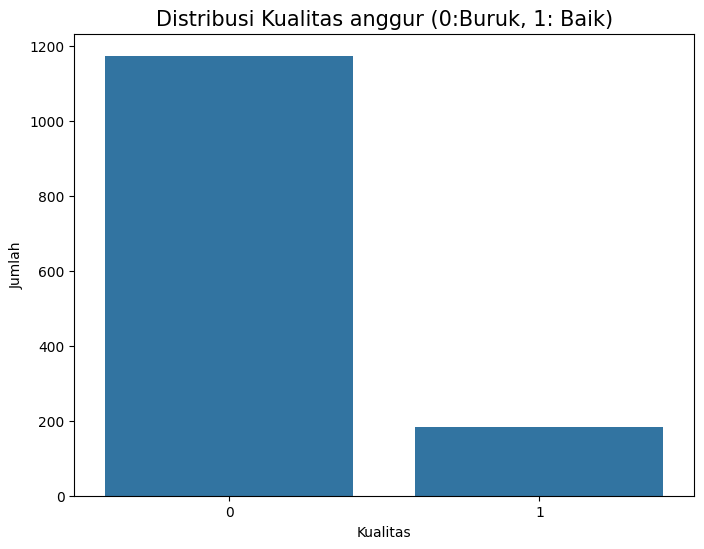

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="quality")
plt.title('Distribusi Kualitas anggur (0:Buruk, 1: Baik)', fontsize=15)
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

Terlihat jelas bahwa dataset ini tidak seimbang (imbalanced), di mana jumlah anggur berkualitas "buruk" (0) jauh lebih banyak daripada yang "baik" (1). Hal ini perlu diperhatikan saat melatih model.


### **3.3 Pemisahan Data (Train-Test Split)**


Kita akan memisahkan dataset menjadi data fitur (X) dan data target (y), kemudian membaginya menjadi set pelatihan dan set pengujian. Penggunaan stratify=y sangat penting untuk memastikan proporsi kelas pada data latih dan data uji sama dengan proporsi pada data asli, terutama pada kasus dataset tidak seimbang.


In [19]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Membagi data menjadi 80% data latih dan 20% data uji
# Menggunakan stratify=y untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Ukuran X_train: {X_train.shape}')
print(f'Ukuran X_test: {X_test.shape}')

Ukuran X_train: (1087, 11)
Ukuran X_test: (272, 11)


In [21]:
# Melihat nilai X dan y
print("Nilai X:")
display(X)

Nilai X:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
print("Nilai y:")
display(y)

Nilai y:


,quality
0,0
1,0
2,0
3,0
5,0
...,...
1593,0
1594,0
1595,0
1597,0


### **4. Pelatihan Model dan Tuning Hyperparameter**

Kita akan menggunakan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik untuk model `RandomForestClassifier`. Ini membantu kita mendapatkan performa model yang paling optimal.


In [23]:
# Menentukan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Membuat model RandomForest. `class_weight='balanced'` digunakan untuk mengatasi masalah class imbalance.
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Menggunakan Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1, # Menggunakan semua core CPU yang tersedia
                           verbose=1
                           )

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Simpan model terbaik
best_rf = grid_search.best_estimator_

# Menampilka hyperparameter dan skor terbaik
print('\nHyperparameter terbaik:', grid_search.best_params_)
print('akurasi terbaik dari cross-validation:', grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits

Hyperparameter terbaik: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
akurasi terbaik dari cross-validation: 0.8859299031835285


## **5. Evaluasi Model**


Setelah mendapatkan model terbaik, kita akan mengevaluasinya pada data uji yang belum pernah dilihat sebelumnya.


### **5.1 Laporan Klasifikasi & Confusion Matrix**


`Classification Report` memberikan rincian metrik seperti presisi, recall, dan f1-score untuk setiap kelas. `Confusion Matrix` memvisualisasikan performa klasifikasi (True Positive, True Negative, False Positive, False Negative).


In [24]:
# Melakukan prediksi pada data uji
y_pred = best_rf.predict(X_test)

In [29]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       235
           1       0.60      0.41      0.48        37

    accuracy                           0.88       272
   macro avg       0.76      0.68      0.71       272
weighted avg       0.87      0.88      0.87       272



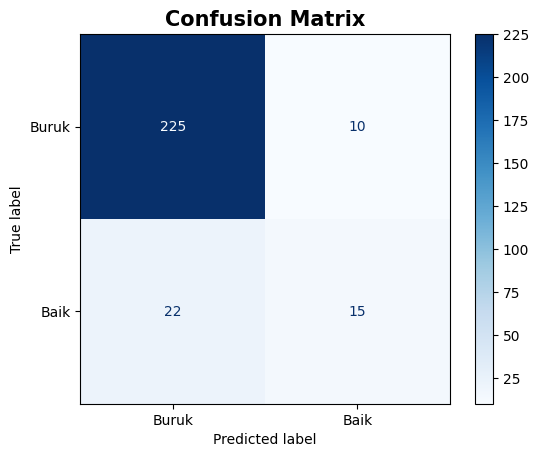

In [31]:
# Membuat dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buruk', 'Baik']).plot(cmap='Blues')
plt.title('Confusion Matrix', fontsize=15, fontweight='bold')
plt.show()

### **5.2 Kurva ROC (Receiver Operating Characteristic)**

Kurva ROC adalah alat evaluasi yang sangat baik untuk masalah klasifikasi biner. Nilai AUC (Area Under the Curve) menunjukkan seberapa baik model dapat membedakan antara dua kelas. Semakin dekat nilainya ke 1, semakin baik modelnya.


In [32]:
# Menghitung probabilitas prediksi
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [34]:
# Menghitung AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc:.4f}")

AUC score: 0.8771


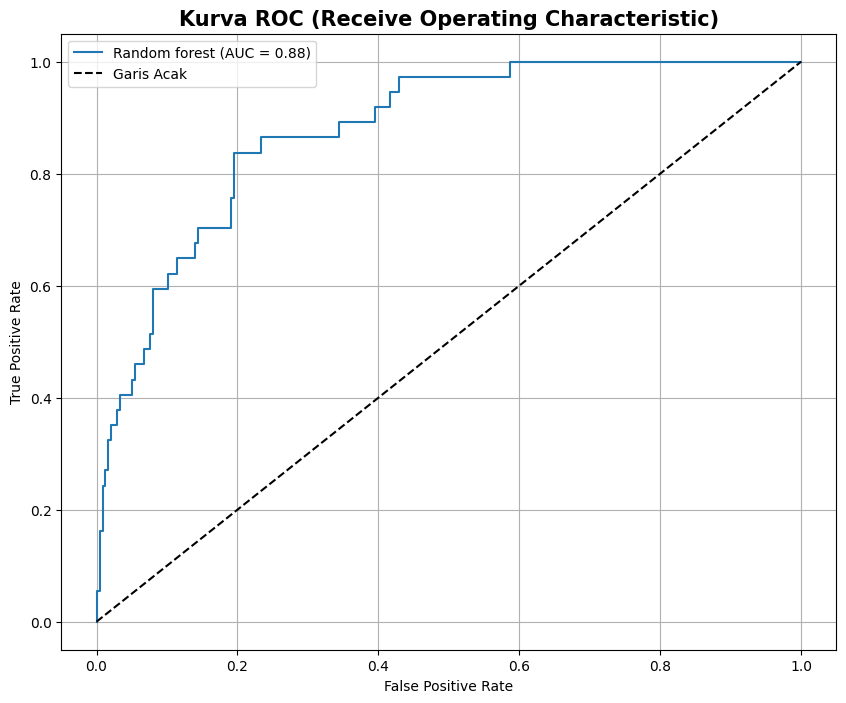

In [37]:
# Membuat plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC (Receive Operating Characteristic)', fontsize=15,
fontweight='bold')
plt.legend(loc='best')
plt.grid()
plt.show()

## **6. Analisis Kepentingan Fitur (Feature Importance)**


Random Forest memungkinkan kita untuk melihat fitur mana yang paling berpengaruh dalam membuat prediksi.


In [38]:
# Membuat series yang menyimpan feature importance dari model dan feature names dari training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns.sort_values(ascending=False))

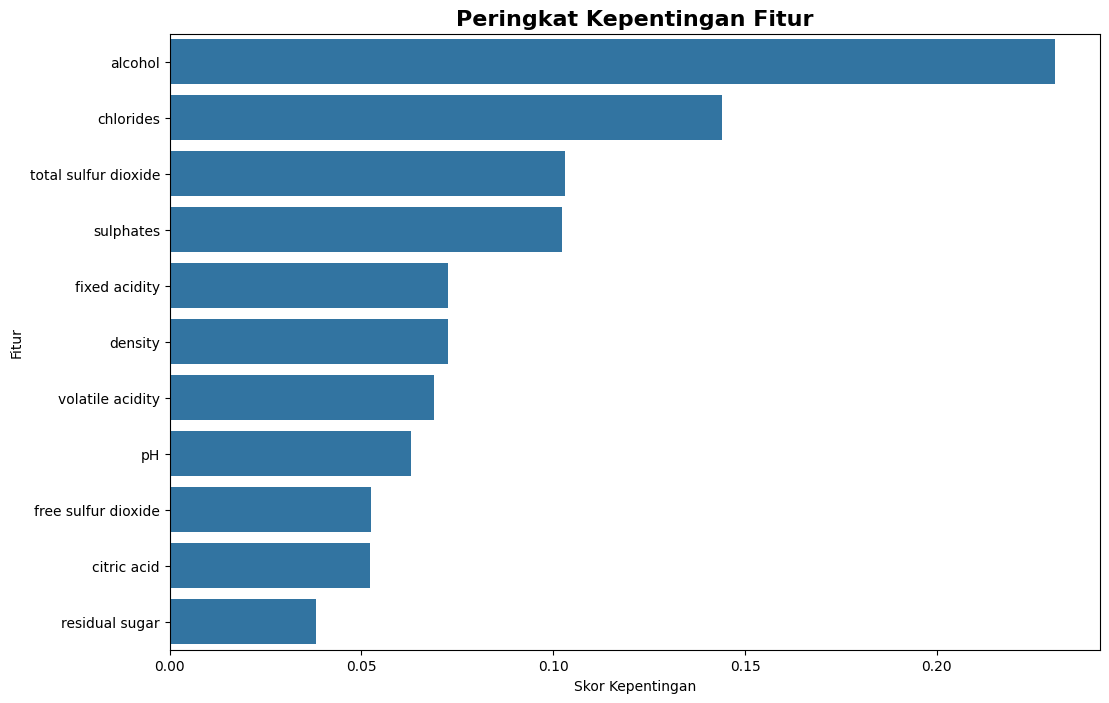

In [42]:
# Membuat plot bar chart
plt.figure(figsize=(12, 8))
feature_importances_sorted = feature_importances.sort_values(ascending=False)
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index)
plt.title('Peringkat Kepentingan Fitur', fontsize=16, fontweight='bold')
plt.xlabel('Skor Kepentingan')
plt.ylabel('Fitur')
plt.show()

In [47]:
print('Fitur Paling Berpengaruh')
feature_importances.sort_values(ascending=False)

Fitur Paling Berpengaruh


,0
alcohol,0.230887
chlorides,0.144058
total sulfur dioxide,0.103051
sulphates,0.102256
fixed acidity,0.072671
density,0.072492
volatile acidity,0.069007
pH,0.062800
free sulfur dioxide,0.052376
citric acid,0.052307


Seperti pada analisis korelasi, `alcohol` kembali menjadi fitur yang paling penting, diikuti oleh `chlorides` dan `total sulfur dioxide`.

## **7. Visualisasi Tree**

Untuk memahami bagaimana model membuat keputusan, kita bisa memvisualisasikan beberapa decision tree pertama dari Random Forest.


Visualisasi Pohon ke-1:


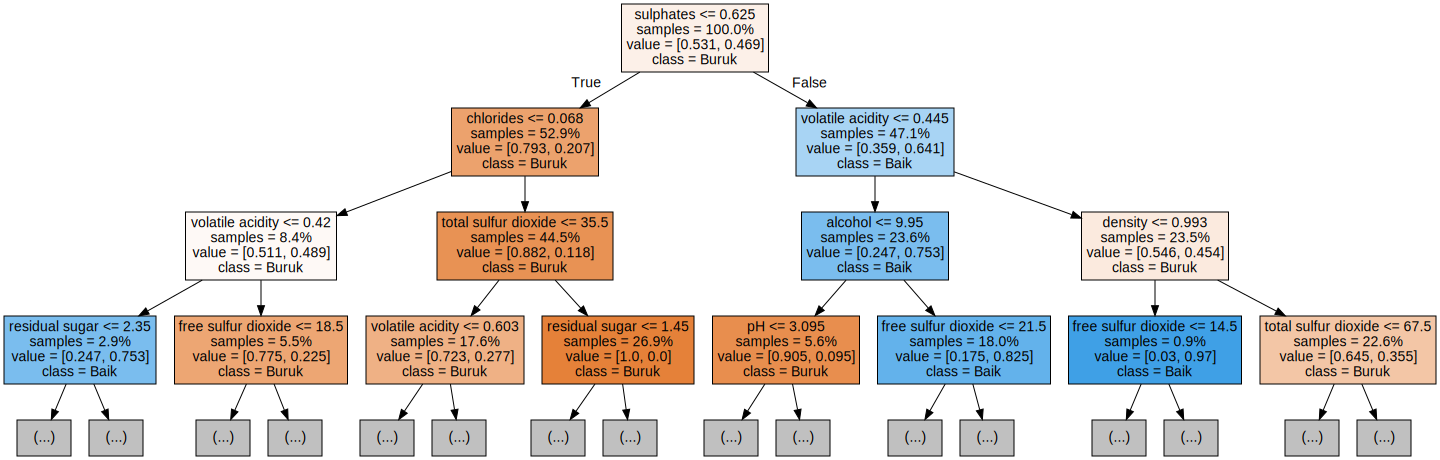

Visualisasi Pohon ke-2:


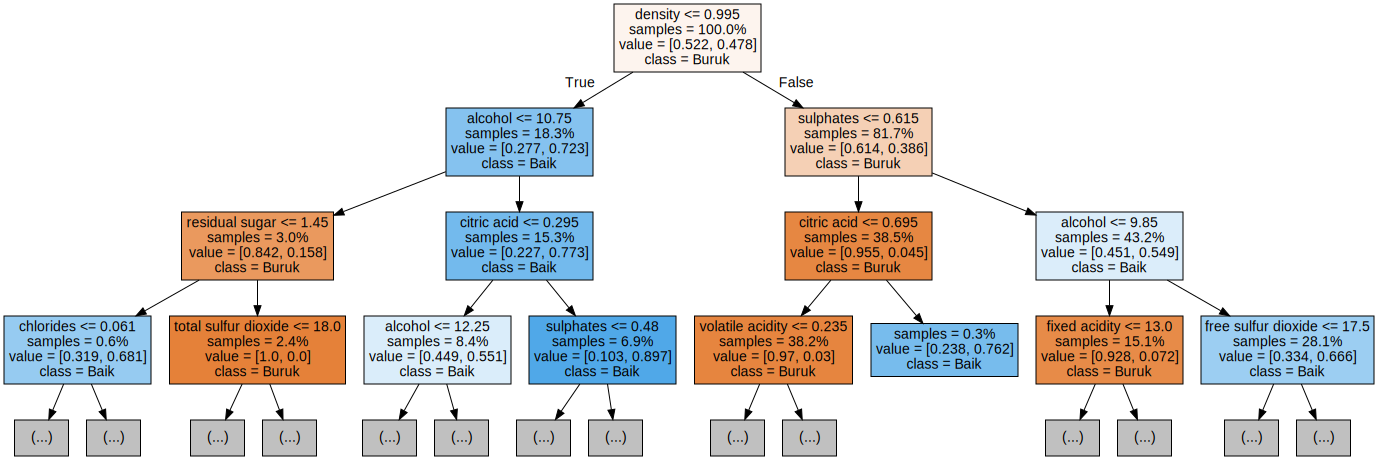

Visualisasi Pohon ke-3:


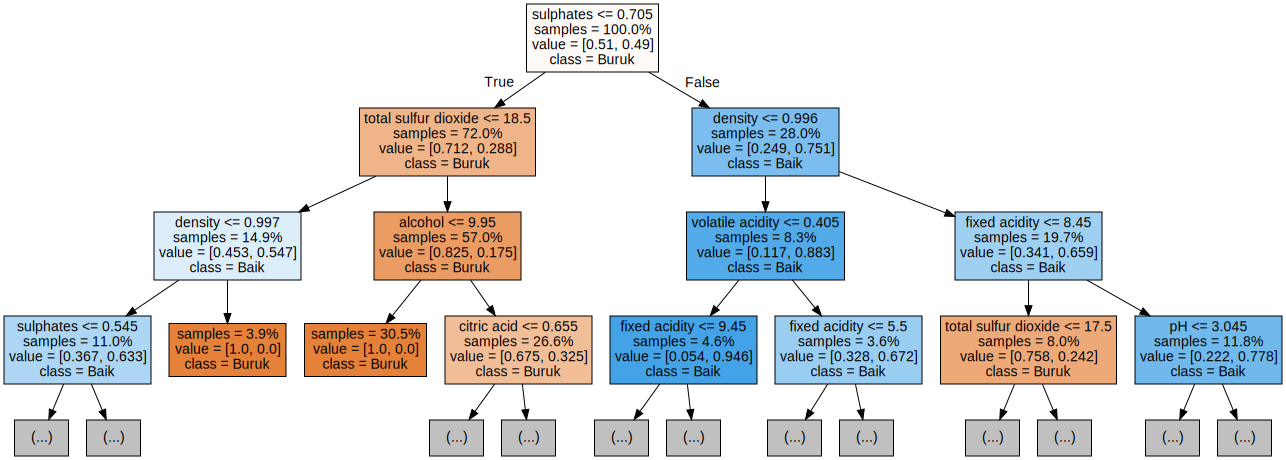

In [50]:
# Visualisasi 3 pohon keputusan pertama dari model Random Forest
for i in range(3):
  tree = best_rf.estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names=X_train.columns,
                             class_names=['Buruk', 'Baik'],
                             filled=True,
                             max_depth=3,  # Membatasi kedalaman untuk visualisasi yang lebih sederhana
                             impurity=False,
                             proportion=True
                             )

  graph = graphviz.Source(dot_data)
  print(f'Visualisasi Pohon ke-{i+1}:')
  display(graph)

In [51]:
# Hasil dari X_test dataframe yang digabung dengan prediksi dan target column yg asli(quality)
final_df = pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True)], axis=1)
final_df['quality_prediction'] = pd.Series(y_pred)

# Print dataframe X_test dengan y_pred dan quality
print(f"Hasil prediksi dari X_test :")
display(final_df)

Hasil prediksi dari X_test :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_prediction
0,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,0,0
1,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,0,0
2,7.2,0.34,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,0,0
3,9.0,0.60,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,0,0
4,7.1,0.66,0.00,3.9,0.086,17.0,45.0,0.99760,3.46,0.54,9.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,7.4,0.64,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,0,0
268,10.4,0.28,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.5,0,0
269,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,1,0
270,9.6,0.60,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,0,0


## **8. Simulasi Prediksi**


Untuk menunjukkan bagaimana model yang telah dilatih dapat digunakan dalam praktiknya, kita akan melakukan simulasi prediksi pada beberapa sampel data hipotetis. Di bawah ini disajikan tiga skenario input data yang berbeda untuk melihat bagaimana model memberikan prediksinya.


### **8.1 Mendefinisikan Fungsi Simulasi**


Pertama, kita akan membuat fungsi yang lebih modular. Fungsi ini akan menerima sebuah *dictionary* data sebagai input, melakukan prediksi, dan menampilkan hasilnya dengan rapi.


In [53]:
def jalankan_simulasi_prediksi(data_input, nama_sampel):
  """
  Fungsi untuk menjalankan dan menampilkan hasil simulasi prediksi.

  Parameters:
  - data_input (dict): Dictionary yang berisi nilai fitur untuk satu sampel.
  - nama_sampel (str): Nama atau label untuk sampel yang diuji.
  """

  label_string = {0: "Buruk", 1: "Baik"}

  # Membuat DataFrame dari input
  df_sim = pd.DataFrame([data_input])

  # Melakukan prediksi menggunakan model terbaik
  prediksi = best_rf.predict(df_sim)
  prediksi_proba = best_rf.predict_proba(df_sim)

  # Menampilkan hasil
  print(f"\n--- Hasil Prediksi untuk {nama_sampel} ---")
  print("Data Input:")
  display(df_sim)

  kualitas_prediksi = prediksi[0]
  label_kualitas = label_string[kualitas_prediksi]
  prob_buruk = prediksi_proba[0][0]
  prob_baik = prediksi_proba[0][1]

  print(f"\nPrediksi Kualitas: {kualitas_prediksi} ({label_kualitas})")
  print(f"Keyakinan Model (Probabilitas):")
  print(f"  - Kualitas Buruk: {prob_buruk:.2%}")
  print(f"  - Kualitas Baik: {prob_baik:.2%}")
  print("-" * 40)

### **8.2 Menyiapkan Data Sampel untuk Simulasi**


Kita akan mendefinisikan tiga set data. Masing-masing set data ini memiliki karakteristik yang berbeda untuk menguji respon model.
1. **Sampel 1: Potensi Kualitas Baik**
Karakteristiknya mengarah pada anggur berkualitas baik (contoh: alkohol tinggi, keasaman volatil rendah).
2. **Sampel 2: Potensi Kualitas Buruk**
Karakteristiknya cenderung menghasilkan anggur berkualitas buruk (contoh: alkohol rendah, keasaman volatil tinggi).
3. **Sampel 3: Kualitas Ambigu/Tengah**
Karakteristik campuran yang membuat prediksi lebih menantang bagi model.

In [54]:
# Skenario 1: Input dengan potensi kualitas "Baik"
sampel_baik = {
    'fixed acidity': 8.5,
    'volatile acidity': 0.35,
    'citric acid': 0.45,
    'residual sugar': 2.0,
    'chlorides': 0.07,
    'free sulfur dioxide': 15,
    'total sulfur dioxide': 40,
    'density': 0.995,
    'pH': 3.3,
    'sulphates': 0.75,
    'alcohol': 12.5  # Nilai alkohol tinggi
}

# Skenario 2: Input dengan potensi kualitas "Buruk"
sampel_buruk = {
    'fixed acidity': 7.0,
    'volatile acidity': 0.8, # Keasaman volatil tinggi
    'citric acid': 0.1,
    'residual sugar': 2.5,
    'chlorides': 0.09,
    'free sulfur dioxide': 8,
    'total sulfur dioxide': 60,
    'density': 0.998,
    'pH': 3.5,
    'sulphates': 0.5,
    'alcohol': 9.2 # Nilai alkohol rendah
}

# Skenario 3: Input dengan nilai rata-rata/ambigu
sampel_tengah = {
    'fixed acidity': 8.3,
    'volatile acidity': 0.53,
    'citric acid': 0.27,
    'residual sugar': 2.5,
    'chlorides': 0.08,
    'free sulfur dioxide': 16,
    'total sulfur dioxide': 47,
    'density': 0.996,
    'pH': 3.3,
    'sulphates': 0.65,
    'alcohol': 10.4
}